In [1]:
import bagpy
from bagpy import bagreader
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
bag_name = 'h2ami_1plot.bag'

b = bagreader(bag_name)

[INFO]  Data folder h2ami_1plot already exists. Not creating.


In [3]:
csv_files = []
for topic in b.topics:
    #print(topic)
    data = b.message_by_topic(topic)
    csv_files.append(data)

In [4]:
print(csv_files)

['h2ami_1plot/cart_left_arm.csv', 'h2ami_1plot/cart_right_arm.csv', 'h2ami_1plot/frame.csv', 'h2ami_1plot/left_arm.csv', 'h2ami_1plot/licas_manipulator-joint_states.csv', 'h2ami_1plot/right_arm.csv', 'h2ami_1plot/uav-pose.csv', 'h2ami_1plot/uav-pose_ref.csv', 'h2ami_1plot/upper_body_3d.csv']


In [5]:
cart_left_arm = pd.read_csv(csv_files[0])
cart_right_arm = pd.read_csv(csv_files[1])
left_arm = pd.read_csv(csv_files[3])
frame = pd.read_csv(csv_files[2])
licas_joint_states = pd.read_csv(csv_files[4])
right_arm = pd.read_csv(csv_files[5])
uav_pose = pd.read_csv(csv_files[6])
uav_pose_ref = pd.read_csv(csv_files[7])
upper_body_3d = pd.read_csv(csv_files[8])



## Plot ARMS

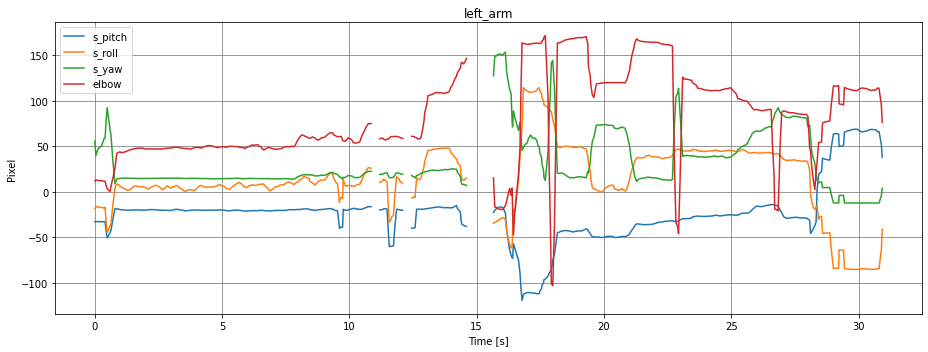

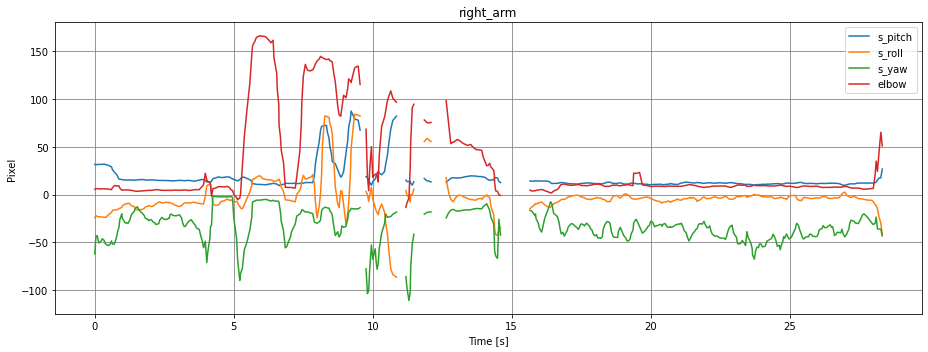

In [119]:

def scale_any_time(time):    
    scaled_time = pd.Series([t - time[0] for t in time])    
    return scaled_time


def plot_arm(arm, savename, title="left_arm"): 
    
        
    w, h = 13, 5
    
    plt.figure(figsize=(w, h))
    
    scaled_t = scale_any_time(arm["Time"])
    s_pitch = arm["shoulder_pitch.data"]
    s_roll = arm["shoulder_roll.data"]
    s_yaw = arm["shoulder_yaw.data"]
    e = arm["elbow.data"]

    
    plt.plot(scaled_t, s_pitch, label="s_pitch")
    plt.plot(scaled_t, s_roll, label="s_roll")
    plt.plot(scaled_t, s_yaw, label="s_yaw")
    plt.plot(scaled_t, e, label="elbow")
    plt.grid(color="grey")
    plt.title("{}".format(title))
    plt.xlabel("Time [s]")
    plt.ylabel("Pixel")
    plt.legend(loc='best')
    plt.tight_layout()
    plt.savefig(savename)
    
plot_arm(left_arm, "larm_test.svg", "left_arm")
plot_arm(right_arm, "rarm_test.svg", "right_arm")

#TODO: Compare and average everything in the code


## Plot 

8043
495


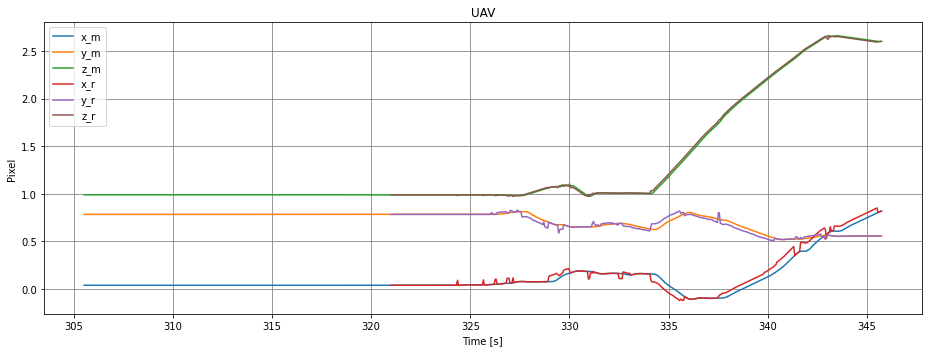

In [120]:
def scale_any_time(time):    
    scaled_time = pd.Series([t - time[0] for t in time])    
    return scaled_time

def plot_uav_position(uav_pose_ref, uav_pose, title): 
    
        
    w, h = 13, 5
    
    plt.figure(figsize=(w, h))
    
    t_uav = uav_pose["Time"]
    t_uav_ref = uav_pose_ref["Time"]
    
    print(len(t_uav))
    print(len(t_uav_ref))
    
    x = uav_pose['pose.position.x']
    y = uav_pose['pose.position.y']
    z = uav_pose['pose.position.z']
    x_r = uav_pose_ref['position.x']
    y_r = uav_pose_ref['position.y']
    z_r = uav_pose_ref['position.z']
    
    #TODO: Add r_vector as a subplot
    #TODO: Scale and crop this part
    #TODO: Use crop DF method from the manipulator plotting 

    plt.plot(t_uav, x, label="x_m")
    plt.plot(t_uav, y, label="y_m")
    plt.plot(t_uav, z, label="z_m")
    plt.plot(t_uav_ref, x_r, label="x_r")
    plt.plot(t_uav_ref, y_r, label="y_r")
    plt.plot(t_uav_ref, z_r, label="z_r")
    plt.grid(color="grey")
    plt.title("{}".format(title))
    plt.xlabel("Time [s]")
    plt.ylabel("Pixel")
    plt.legend(loc='best')
    plt.tight_layout()
    plt.savefig("{}.svg".format(title))

plot_uav_position(uav_pose_ref, uav_pose, title="UAV")




In [121]:
print(uav_pose)

         Time  header.seq  header.stamp.secs  header.stamp.nsecs  \
0     305.526       58880                305           513000000   
1     305.526       58881                305           518000000   
2     305.526       58882                305           523000000   
3     305.528       58883                305           528000000   
4     305.533       58884                305           533000000   
...       ...         ...                ...                 ...   
8038  345.726       66922                345           723000000   
8039  345.728       66923                345           728000000   
8040  345.733       66924                345           733000000   
8041  345.737       66925                345           738000000   
8042  345.743       66926                345           743000000   

     header.frame_id  pose.position.x  pose.position.y  pose.position.z  \
0              world         0.038252         0.783358         0.989050   
1              world         0.03

In [122]:
def plot_upper_body_detections(upper_body1, upper_body2, title): 
    
    
    ot = scale_any_time(upper_body1["Time"])
    st = scale_any_time(upper_body2["Time"])
    
    # 1
    olsx = upper_body1["left_shoulder.x"]
    olsy = upper_body1["left_shoulder.y"]
    olsz = upper_body1["left_shoulder.z"] 
    
    slsx = upper_body2["left_shoulder.x"]
    slsy = upper_body2["left_shoulder.y"]
    slsz = upper_body2["left_shoulder.z"]    
    
    #3
    orsx = upper_body1["right_shoulder.x"]
    orsy = upper_body1["right_shoulder.y"]
    orsz = upper_body1["right_shoulder.z"]
    
    srsx = upper_body2["right_shoulder.x"]
    srsy = upper_body2["right_shoulder.y"] 
    srsz = upper_body2["right_shoulder.z"]
    
    #4
    olex = upper_body1["left_elbow.x"]
    oley = upper_body1["left_elbow.y"]
    olez = upper_body1["left_elbow.z"]
    
    slex = upper_body2["left_elbow.x"]
    sley = upper_body2["left_elbow.y"]
    slez = upper_body2["left_elbow.z"]
    
    #5
    orex = upper_body1["right_elbow.x"]
    orey = upper_body1["right_elbow.y"]
    orez = upper_body1["right_elbow.z"]
    
    srex = upper_body2["right_elbow.x"]
    srey = upper_body2["right_elbow.y"]
    srez = upper_body2["right_elbow.z"]   
    
    #6
    orwx = upper_body1["right_wrist.x"]
    orwy = upper_body1["right_wrist.y"]
    orwz = upper_body1["right_wrist.z"]
    
    srwx = upper_body2["right_wrist.x"]
    srwy = upper_body2["right_wrist.y"]
    srwz = upper_body2["right_wrist.z"]  
    
    #7
    olwx = upper_body1["left_wrist.x"]
    olwy = upper_body1["left_wrist.y"]
    olwz = upper_body1["left_wrist.z"]
    
    slwx = upper_body2["left_wrist.x"]
    slwy = upper_body2["left_wrist.y"]
    slwz = upper_body2["left_wrist.z"]
    
    f, axs = plt.subplots(3, 2, sharey=True, figsize=(15, 15))
    # left shoulder
    axs[0][0].plot(ot, olsx, "r", label="xo")
    axs[0][0].plot(ot, olsy, "b",  label="yo")
    axs[0][0].plot(ot, olsz, "g",  label="zo")
    
    axs[0][0].plot(st, slsx, "r-.", label="xs")
    axs[0][0].plot(st, slsy, "b-.",  label="ys")
    axs[0][0].plot(st, slsz, "g-.",  label="zs")
    
    axs[0][0].legend(loc="best")
    axs[0][0].grid(); axs[0][0].set_title("Left shoulder"); axs[0][0].set_xlabel("t [s]"); axs[0][0].set_ylabel("position [m]")
    
    # right shoulder
    axs[0][1].plot(ot, orsx, "r", label="xo")
    axs[0][1].plot(ot, orsy, "b", label="yo")
    axs[0][1].plot(ot, orsz, "g", label="zo")  
    
    axs[0][1].plot(st, slsx, "r-.", label="xs")
    axs[0][1].plot(st, slsy, "b-.",  label="ys")
    axs[0][1].plot(st, slsz, "g-.",  label="zs")
    
    axs[0][1].legend(loc="best")
    axs[0][1].grid(); axs[0][1].set_title("Right shoulder"); axs[0][1].set_xlabel("t [s]"); 
    
    # left elbow
    axs[1][0].plot(ot, olex, "r", label="xo")
    axs[1][0].plot(ot, oley, "b", label="yo")
    axs[1][0].plot(ot, olez, "g", label="zo")
    
    axs[1][0].plot(st, slex, "r-.", label="xs")
    axs[1][0].plot(st, sley, "b-.",  label="ys")
    axs[1][0].plot(st, slez, "g-.",  label="zs")
    
    axs[1][0].legend(loc="best")
    axs[1][0].grid(); axs[1][0].set_title("Left elbow"); axs[1][0].set_xlabel("t [s]"); axs[1][0].set_ylabel("position [m]")
    
    # right elbow
    axs[1][1].plot(ot, orex, "r", label="xo")
    axs[1][1].plot(ot, orey, "b", label="yo")
    axs[1][1].plot(ot, orez, "g", label="zo")
    
    axs[1][1].plot(st, srex, "r-.", label="xs")
    axs[1][1].plot(st, srey, "b-.", label="ys")
    axs[1][1].plot(st, srez, "g-.", label="zs")
    
    axs[1][1].legend(loc="best")
    axs[1][1].grid(); axs[1][1].set_title("Right elbow"); axs[1][1].set_xlabel("t [s]"); axs[1][1].set_ylabel("position [m]")
    
    # left wrist
    axs[2][0].plot(ot, olwx, "r", label="xo")
    axs[2][0].plot(ot, olwy, "b", label="yo")
    axs[2][0].plot(ot, olwz, "g", label="zo")
    
    axs[2][0].plot(st, slwx, "r-.", label="xs")
    axs[2][0].plot(st, slwy, "b-.", label="ys")
    axs[2][0].plot(st, slwz, "g-.", label="zs")
    
    axs[2][0].legend(loc="best")
    axs[2][0].grid(); axs[2][0].set_title("Left wrist"); axs[2][0].set_xlabel("t [s]"); axs[2][0].set_ylabel("position [m]")
    
    # right wrist
    axs[2][1].plot(ot, orwx, "r", label="xo")
    axs[2][1].plot(ot, orwy, "b", label="yo")
    axs[2][1].plot(ot, orwz, "g", label="zo")
    
    axs[2][1].plot(st, srwx, "r-.", label="xs")
    axs[2][1].plot(st, srwy, "b-.", label="ys")
    axs[2][1].plot(st, srwz, "g-.", label="zs")
    
    axs[2][1].legend(loc="best")    
    axs[2][1].grid(); axs[2][1].set_title("Reft wrist"); axs[2][1].set_xlabel("t [s]"); axs[2][1].set_ylabel("position [m]")
   
    plt.tight_layout()
    plt.savefig(title)
    #ax1.plot(t, lsx)
    #ax1.plot(t, lsy)
    #ax1.plot(t, lsz)
    #ax2.plot

    
    
    
    

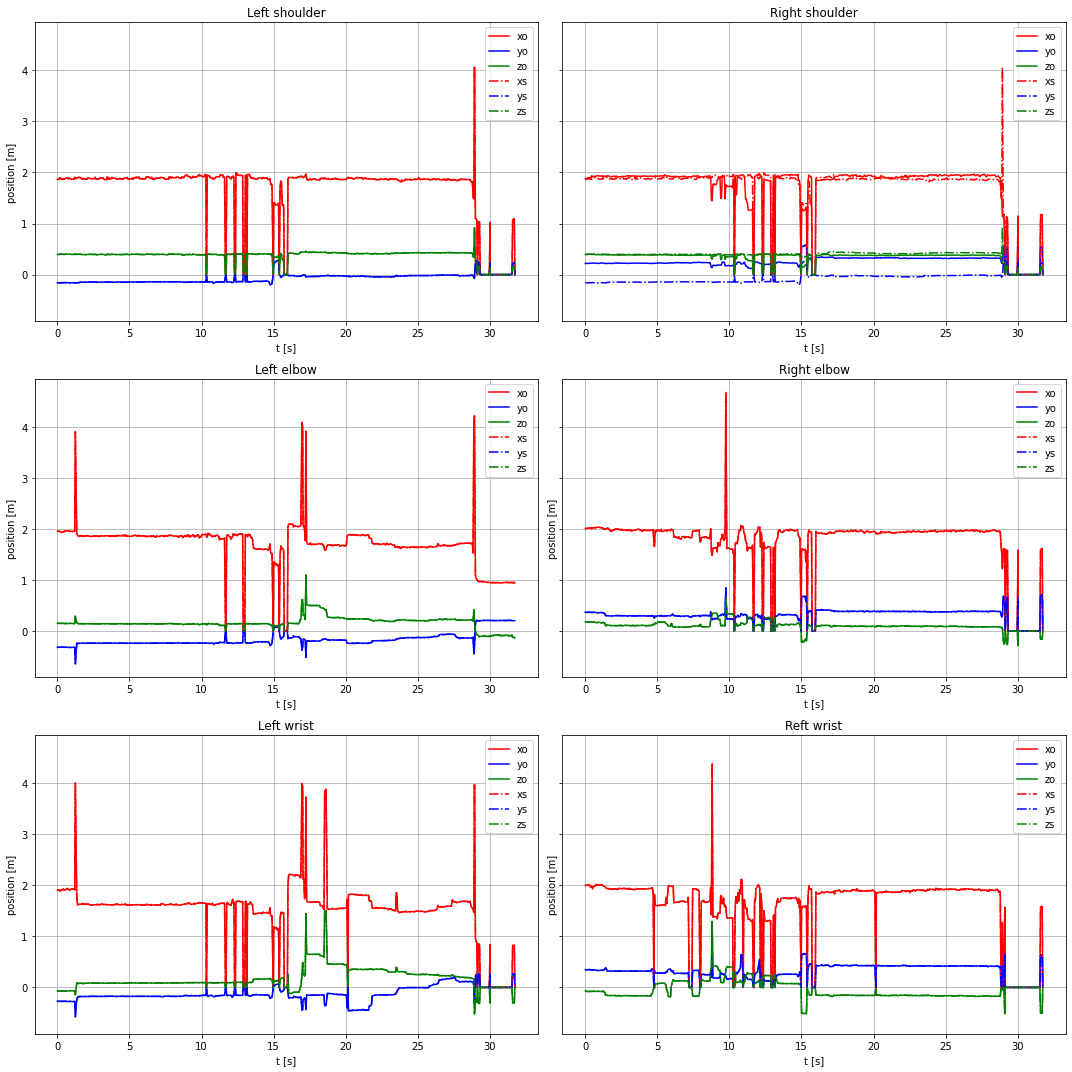

In [123]:
plot_upper_body_detections(upper_body_3d, upper_body_3d, "hpe_comparison.svg")